# Introduction

In this analysis, we explore the USArrests dataset, which contains crime statistics from the 50 U.S. states—namely, Murder, Assault, UrbanPop, and Rape rates. Our goal is to employ unsupervised learning techniques to uncover underlying patterns in the data. We begin by preprocessing the data (loading, cleaning, and indexing) and then apply various clustering methods:

* K-Means Clustering: We determine the optimal number of clusters using the Elbow Method and visualize the clustering results in both 2D and 3D scatter plots.
* Hierarchical Clustering: We generate dendrograms using different linkage methods to observe the hierarchical structure among states.
* Principal Component Analysis (PCA): We reduce the dimensionality of the dataset to highlight the most significant components, facilitating better visualization and interpretation of the clusters.

**_Note:_** Some variable names in the code (e.g., “bilesen_df”, “birinci_bilesen”) are left in Turkish due to time constraints in reformatting them.

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

# K-Means

- The number of clusters is determined.
- Randomly select k centers.
- For each observation, the distances to the k centers are calculated and the observation is assigned to the closest center.
- Each observation is assigned to the cluster corresponding to its nearest center.
- After the assignment, the centers for the resulting clusters are recalculated.
- This process is repeated for a predetermined number of iterations, and the clustering structure corresponding to the configuration with the minimum total within-cluster sum of squared errors is chosen as the final clustering.

In [3]:
df = pd.read_csv("USArrests.csv").copy()

In [4]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
df.index = df.iloc[:,0]

In [6]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,,
Alabama,Alabama,13.2,236,58,21.2
Alaska,Alaska,10.0,263,48,44.5
Arizona,Arizona,8.1,294,80,31.0
Arkansas,Arkansas,8.8,190,50,19.5
California,California,9.0,276,91,40.6


In [7]:
df = df.iloc[:, 1:5]

In [8]:
df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [9]:
df.index.name = None

In [10]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [11]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


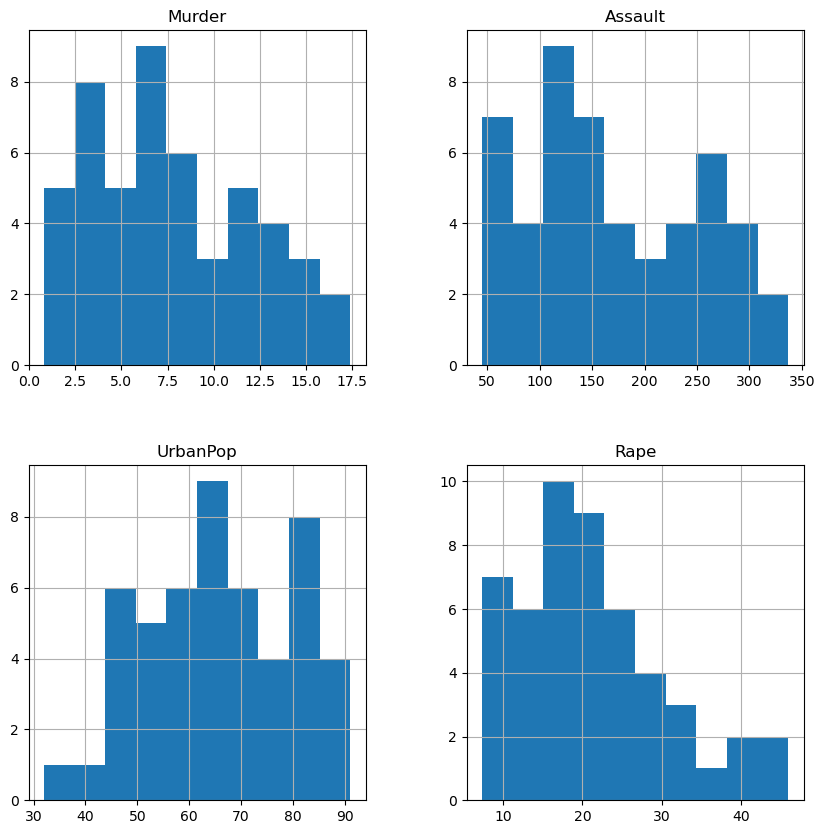

In [14]:
df.hist(figsize=(10,10));

## K-Means Model and Visualization

In [15]:
kmeans = KMeans(n_clusters=4)

In [16]:
?kmeans

Type:        KMeans
String form: KMeans(n_clusters=4)
File:        c:\users\frkng\.conda\lib\site-packages\sklearn\cluster\_kmeans.py
Docstring:  
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization:

    'k-means++' : selects initial cluster centroids using sampling based on
    an empirical probability distribution of the points' contribution to the
    overall inertia. This technique speeds up convergence. The algorithm
    implemented is "greedy k-means++". It differs from the vanilla k-means++
    by making several trials at each sampling step and choosing the best centroid
    among them.

    'random': choose `n_clusters` observations (rows) at random from data
    for the init

In [17]:
k_fit = kmeans.fit(df)

In [18]:
k_fit.n_clusters

4

In [19]:
k_fit.cluster_centers_

array([[  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ]])

In [20]:
k_fit.labels_ # class label of regions

array([1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 0, 3, 1, 3, 0, 3, 3, 1, 0, 1, 2, 1,
       0, 1, 2, 3, 3, 1, 0, 2, 1, 1, 1, 0, 3, 2, 2, 3, 2, 1, 0, 2, 2, 3,
       0, 2, 2, 0, 0, 2])

In [21]:
kmeans = KMeans(n_clusters=4)
k_fit = kmeans.fit(df)

In [22]:
clusters  = k_fit.labels_

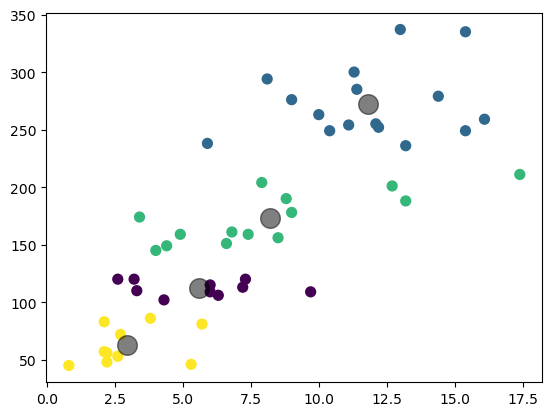

In [23]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c  = clusters, s=50, cmap="viridis");
centers = k_fit.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c = "black", s = 200, alpha=0.5);

In [24]:
from mpl_toolkits.mplot3d import Axes3D

In [25]:
kmeans = KMeans(n_clusters=3)

In [26]:
k_fit = kmeans.fit(df)
clusters = k_fit.labels_
centers = kmeans.cluster_centers_

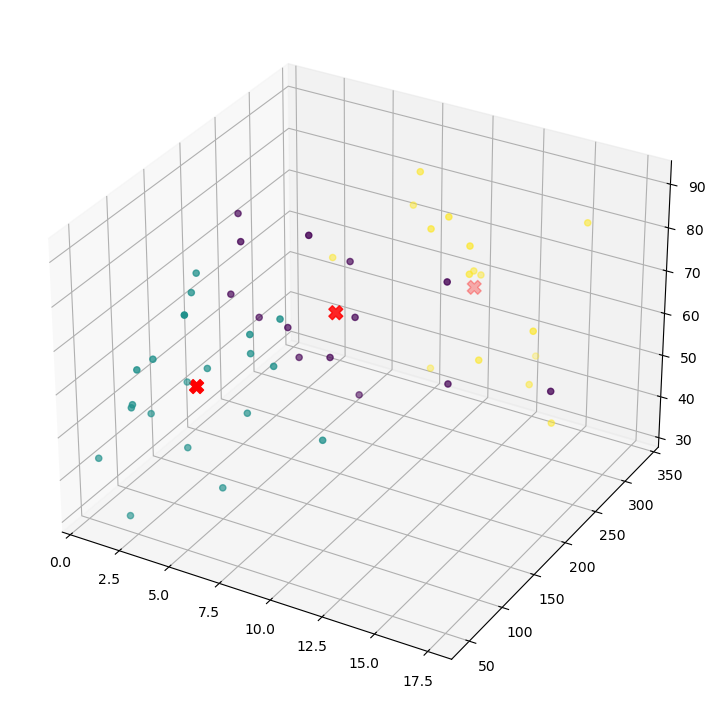

In [27]:
plt.rcParams["figure.figsize"] = (16,9)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.iloc[:,0], df.iloc[:,1], df.iloc[:,2], c=clusters, cmap='viridis')
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], s=100, c='red', marker='X')
plt.show()

In [28]:
kmeans = KMeans(n_clusters=3)
k_fit = kmeans.fit(df)
clusters = k_fit.labels_

In [29]:
pd.DataFrame({"States": df.index, "Clusters": clusters})[0:10]

,States,Clusters
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,2
4,California,1
5,Colorado,2
6,Connecticut,0
7,Delaware,1
8,Florida,1
9,Georgia,2


In [30]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [31]:
#df = df.drop("cluster_no", axis = 1)

### Determining The Optimum Number Of Clusters

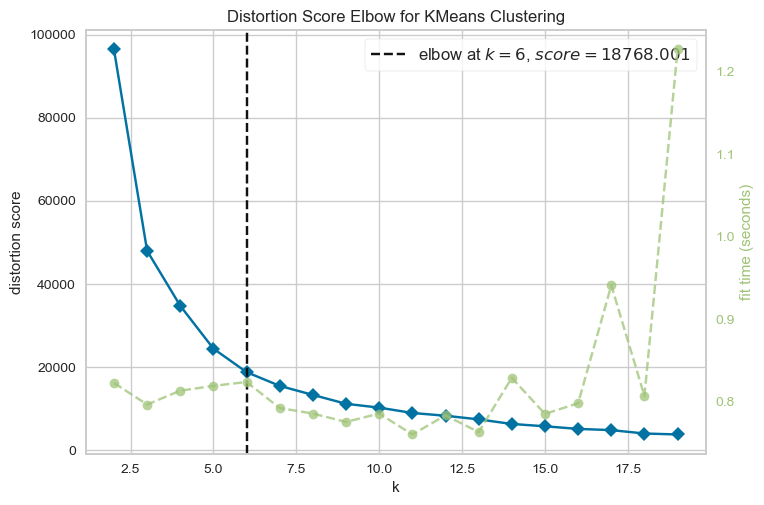

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
#!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans,k=(2,20))
visualizer.fit(df)
visualizer.poof()

In [33]:
kmeans = KMeans(n_clusters=6)
k_fit = kmeans.fit(df)
clusters = k_fit.labels_

In [34]:
pd.DataFrame({"States": df.index, "Clusters": clusters})[0:10]

,States,Clusters
0,Alabama,2
1,Alaska,2
2,Arizona,0
3,Arkansas,5
4,California,2
5,Colorado,5
6,Connecticut,1
7,Delaware,2
8,Florida,0
9,Georgia,5


# Hierarchical Clustering

In [36]:
df = pd.read_csv("USArrests.csv").copy()
df.index = df.iloc[:,0]
df = df.iloc[:,1:5]
#del df.index.name
df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [37]:
from scipy.cluster.hierarchy import linkage
hc_complete = linkage(df, "complete")
hc_average = linkage(df, "average")
hc_single = linkage(df, "single")

In [38]:
dir(hc_complete)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__o

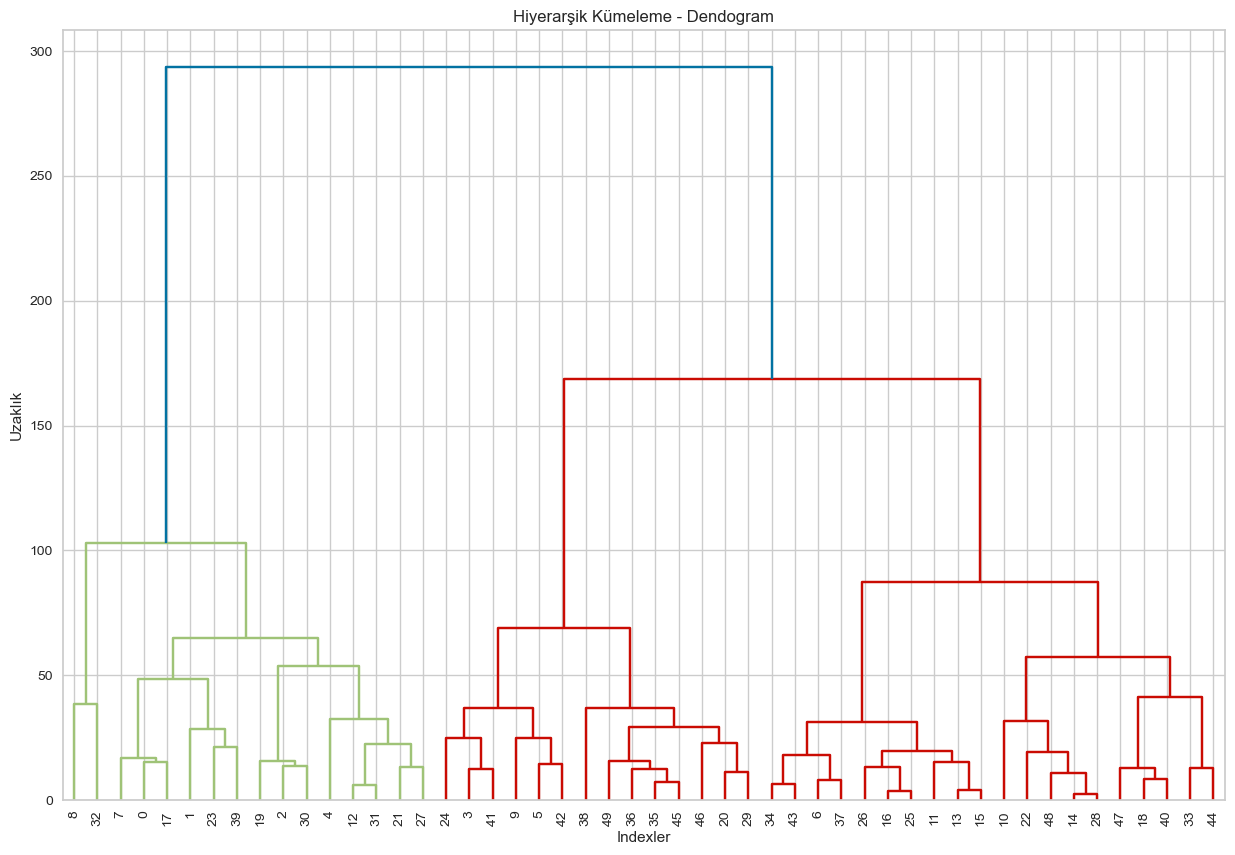

In [39]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(
    hc_complete,
    leaf_font_size=10
);

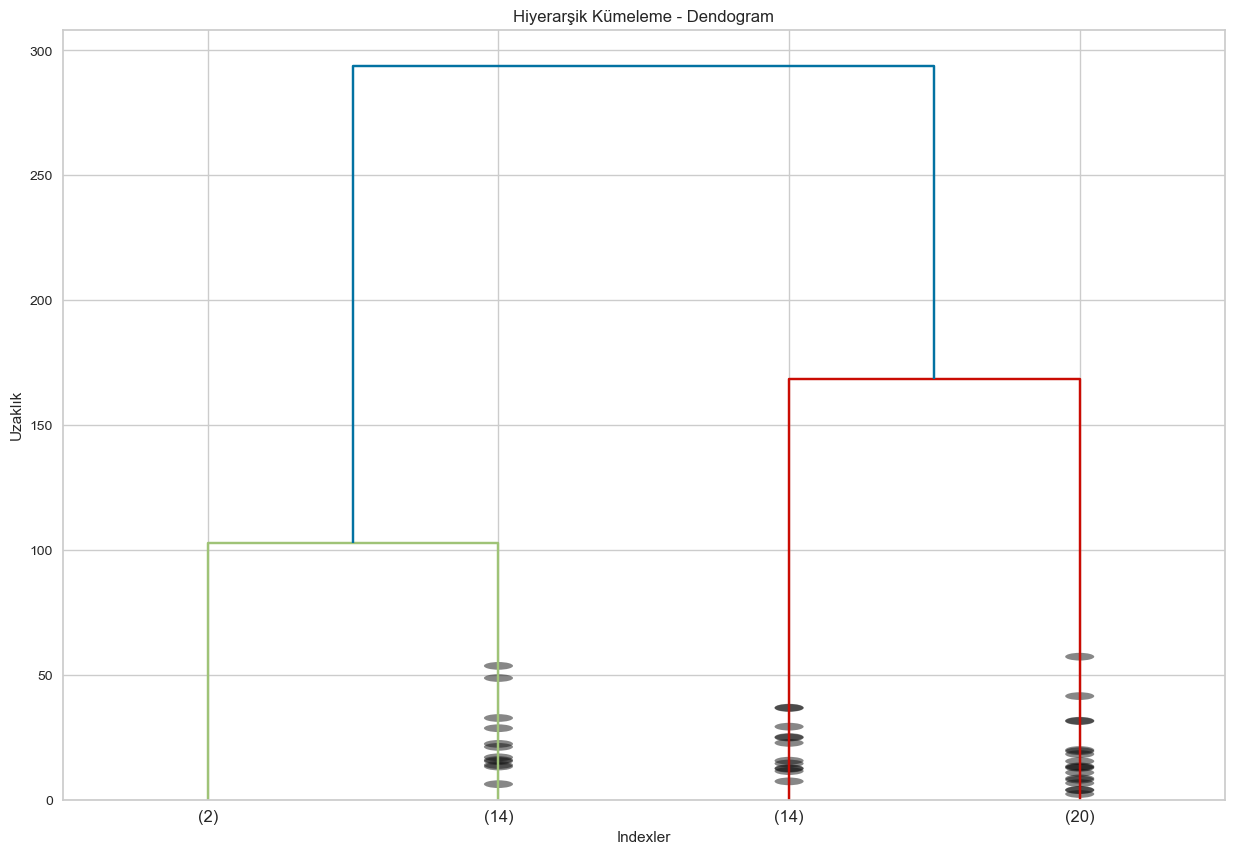

In [40]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(
    hc_complete,
    truncate_mode = "lastp",
    p = 4,
    show_contracted = True
);

## Optimum Number of Clusters

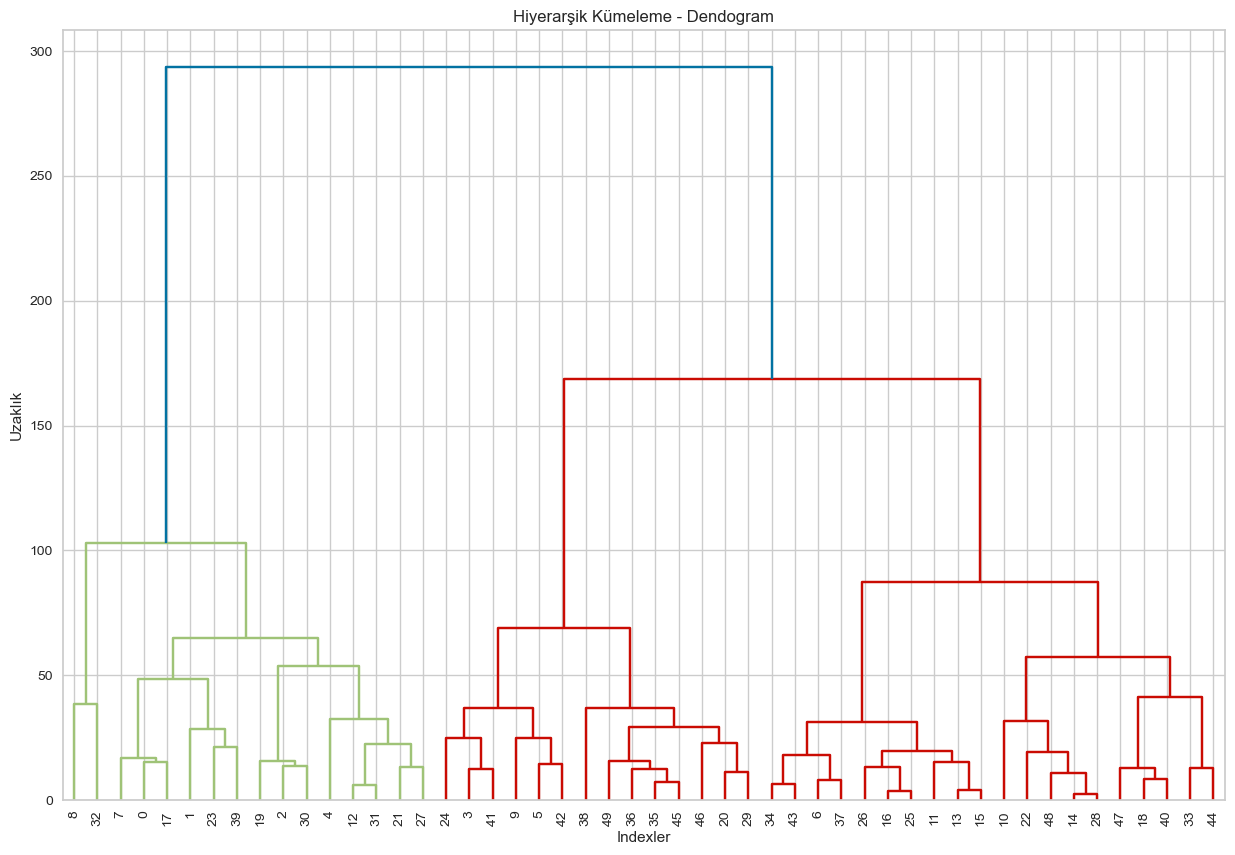

In [41]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
den = dendrogram(
    hc_complete,
    leaf_font_size=10
);

In [42]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 4,
                                  affinity = "euclidean",
                                  linkage = "ward")

cluster.fit_predict(df)

array([0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 2, 0,
       1, 0, 2, 3, 3, 0, 1, 2, 0, 0, 0, 1, 3, 2, 2, 3, 2, 0, 1, 2, 2, 3,
       1, 2, 2, 1, 1, 2], dtype=int64)

In [43]:
pd.DataFrame({"States" : df.index, "Cluster": cluster.fit_predict(df)})[0:10]

,States,Cluster
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,2
4,California,0
5,Colorado,2
6,Connecticut,3
7,Delaware,0
8,Florida,0
9,Georgia,2


In [44]:
df["cluster_no"] = cluster.fit_predict(df)

In [45]:
df.head()

,Murder,Assault,UrbanPop,Rape,cluster_no
Unnamed: 0,,,,,
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,0


# PCA

In [46]:
df = pd.read_csv("USArrests.csv").copy()
df.index = df.iloc[:,0]
df = df.iloc[:,1:5]
#del df.index.name
df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [47]:
from warnings import filterwarnings
filterwarnings('ignore')

In [48]:
from sklearn.preprocessing import StandardScaler

df = StandardScaler().fit_transform(df)
df[0:5,0:5]

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393]])

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pca_fit = pca.fit_transform(df)

In [50]:
bilesen_df = pd.DataFrame(data = pca_fit,
                          columns = ["birinci_bilesen","ikinci_bilesen","ucuncu_bilesen"])

In [51]:
bilesen_df.head()

,birinci_bilesen,ikinci_bilesen,ucuncu_bilesen
0,0.985566,1.133392,-0.444269
1,1.950138,1.073213,2.040003
2,1.763164,-0.745957,0.054781
3,-0.141420,1.119797,0.114574
4,2.523980,-1.542934,0.598557


In [68]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 ])

In [69]:
pca = PCA().fit(df)

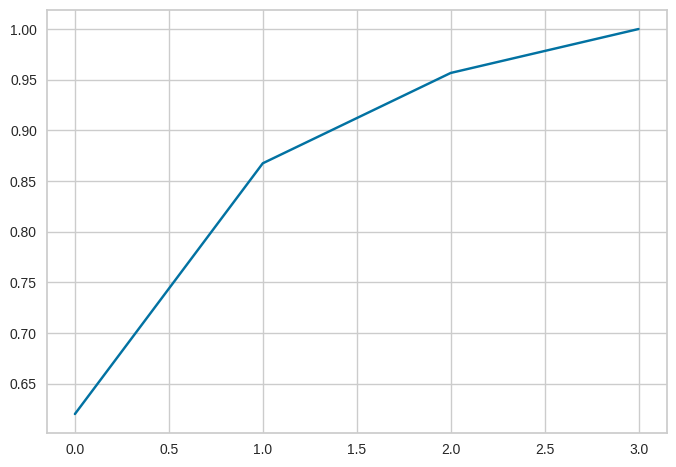

In [70]:
plt.plot(np.cumsum(pca.explained_variance_ratio_));

# Conclusion

The application of clustering and dimensionality reduction techniques on the USArrests dataset has yielded valuable insights into the data's structure. Both K-Means and Hierarchical Clustering have effectively grouped the states based on their crime rates, with the Elbow Method assisting in selecting the optimal number of clusters. PCA further aided in simplifying the dataset by reducing it to a few principal components, thereby capturing the majority of the variance and enhancing visualization capabilities. Despite some variable names remaining in Turkish, the overall analysis demonstrates how unsupervised learning methods can be applied to extract meaningful patterns from real-world data, serving as a robust foundation for further investigations and informed decision-making.

**I recommend you to look at other machine learning courses and models from the links below, have fun :)**

**Thank you for your votes and comments**

**If you have any question or suggest, I will be happy to hear it.**

**Machine Learning I - Linear Regression And Cousins:** https://www.kaggle.com/code/furykan/machine-learning-i-linear-regression-and-cousins

**Machine Learning II - NonLinear Regression Models:** https://www.kaggle.com/code/furykan/machine-learning-ii-nonlinear-regression-models

**Machine Learning III - Classification Problems:** https://www.kaggle.com/code/furykan/machine-learning-iii-classification-problems